In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [37]:
df = pd.read_csv("C:\\Users\\Sasha\\Desktop\\Py\\Git\\PracticeModels\\Projects\\CensusSalary\\Census.csv")
# dataset location https://archive.ics.uci.edu/ml/datasets/Adult

In [38]:
df.head()

,Age,Workclass,Fnlwgt,Education,EducationClass,MaritialStatus,Occupation,Relationship,Race,Sex,CapitalGain,CapitalLoss,HoursPerWeek,NativeCountry,Salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32561 non-null  int64 
 1   Workclass       32561 non-null  object
 2   Fnlwgt          32561 non-null  int64 
 3   Education       32561 non-null  object
 4   EducationClass  32561 non-null  int64 
 5   MaritialStatus  32561 non-null  object
 6   Occupation      32561 non-null  object
 7   Relationship    32561 non-null  object
 8   Race            32561 non-null  object
 9   Sex             32561 non-null  object
 10  CapitalGain     32561 non-null  int64 
 11  CapitalLoss     32561 non-null  int64 
 12  HoursPerWeek    32561 non-null  int64 
 13  NativeCountry   32561 non-null  object
 14  Salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [40]:
X = df.drop(['Salary', 'Fnlwgt', 'EducationClass', 'CapitalGain', 'CapitalLoss'],axis=1)
y = df.iloc[:, -1].values

In [41]:
X = pd.get_dummies(X, columns=['Workclass','Education','MaritialStatus','Occupation','Relationship','Race','Sex','NativeCountry'])

In [42]:
X = X.iloc[:, :].values

In [43]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[4511  407]
 [ 711  884]]


0.8283433133732535

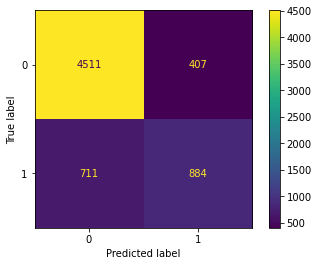

In [47]:
from sklearn.metrics import plot_confusion_matrix
pltcm = plot_confusion_matrix(log_reg, X_test, y_test)